In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')[0:-1]) + '/project/'

In [3]:
#data = pd.read_csv(datadir+'Dataset_clean_1106.csv')
data = pd.read_csv(datadir+'data_clean_divide.csv')

In [4]:
#drom correlated features
data = data.drop(['funny_review',
'cool_review',
'fans',
'useful_review', 'funny_user', 'elite_years',
'useful_user',
'cool_user',
'compliment_funny',
'compliment_plain','compliment_photos','compliment_list',
'compliment_note', 'compliment_writer', 'compliment_cute', 'compliment_profile', 'compliment_cool',
                 'compliment_hot', 'compliment_more', 'date_review_to_now'], axis=1)
#data_clean=data_clean.drop(['useful_user', 'funny_user', 'cool_user','compliment_profile', 'compliment_note','compliment_hot','compliment_more', 'compliment_list', 'compliment_cool', 'compliment_funny','compliment_plain', 'compliment_writer','compliment_cute','fans','funny_review','cool_review'],axis=1)

In [5]:
#normalized features
from sklearn import preprocessing
for col in data.columns:
    if (data[col].min() == 0 and data[col].max() == 1):
        data[col] = data[col]
    else:
        data[col] = preprocessing.scale(data[col])
        
# bool_cols = [col for col in data if data[[col]].dropna().isin([0, 1]).all().values]
# bool_cols


/Users/zhl/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [6]:
from sklearn.model_selection import train_test_split
X, y = data.drop('Useful', 1), data['Useful']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
data_train, data_test = train_test_split(data, train_size = 0.8)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr = LogisticRegression()
lr.fit(X_train, y_train)
# rfe = RFE(lr)
# rfe = rfe.fit(X_train, y_train)
pred_lr = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
roc_auc = roc_auc_score(y_test, pred_lr)
# plt.plot(fpr, tpr, color = 'r', label = 'LR' + ' (AUC = %0.3f)' % roc_auc)
# plt.show()
#print(lr.score(X_test, y_test))
print(lr.score(X_test, y_test))
print(roc_auc)
#print(lr.coef_)
#print(np.std(X_train))
# print(rfe.support_)
# print(rfe.ranking_)
#X_train.transpose()[rfe.support_]

0.791570104287
0.780244147827


In [42]:
for (a,b) in zip(X_train.columns,lr.coef_[0]):
    print(a,b)


stars_review -0.202169733308
is_open 1.05506631122
review_count_business -0.111346783336
stars_business 0.271913329593
attributes.RestaurantsPriceRange2 -0.095137436161
review_count_user 0.404079978182
average_stars_user 0.137187263813
since_first_review 0.143411533292
friends_number 0.369773991995
text_length 0.35461372513
text_positive 0.224985074072
text_negative -0.0706168239864
user_yelping_to_now -0.446510570073
Chinese -0.103187804323
Mexican -0.0372034508815
American -0.0539067077913
Korean 0.302760950839
Italian -0.0780918500946
Japanese 0.137020961579
Thai -0.261826991356
Vietnamese -0.0802479559021
count_food_detail 0.0378212167582
count_food_quality 0.016919684063
operatinghours 0.0294130093774
price_cost -0.00114944863072
traffic 0.0195635346642
queue_in_line 0.0192505731015
service -0.0408671087246
ambience -0.0181621811634


In [19]:
#top 10 important features
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_ )
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 10
Selected Features: [ True  True False  True False  True False False  True  True  True False
  True False False False  True False False  True False False False False
 False False False False False]
Feature Ranking: [ 1  1  4  1  6  1  2  5  1  1  1  8  1  9 14 11  1 10  3  1  7 13 19 15 20
 17 16 12 18]


In [21]:
print(X_train.columns[fit.support_])

Index(['stars_review', 'is_open', 'stars_business', 'review_count_user',
       'friends_number', 'text_length', 'text_positive', 'user_yelping_to_now',
       'Korean', 'Thai'],
      dtype='object')


In [8]:
#top 3 important features
reduced_train = lr.transform(X_train)
reduced_test = lr.transform(X_test)

/Users/zhl/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/zhl/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [33]:
reduced_train = X_train[['stars_review', 'is_open', 'stars_business', 'review_count_user',
       'friends_number', 'text_length', 'text_positive', 'user_yelping_to_now',
       'Korean', 'Thai']]
reduced_test = X_test[['stars_review', 'is_open', 'stars_business', 'review_count_user',
       'friends_number', 'text_length', 'text_positive', 'user_yelping_to_now',
       'Korean', 'Thai']]
reduced_data = data[['stars_review', 'is_open', 'stars_business', 'review_count_user',
       'friends_number', 'text_length', 'text_positive', 'user_yelping_to_now',
       'Korean', 'Thai', 'Useful']]

In [28]:
lr.fit(reduced_train, y_train)
pred_lr = lr.predict_proba(reduced_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
roc_auc = roc_auc_score(y_test, pred_lr)
print(lr.score(reduced_test, y_test))
print(roc_auc)

0.787707609115
0.776382235708


In [32]:
#different panelty
#logistic regression(class_weight = "balanced)
cs = [10**i for i in range(-8,2)]
aucs = dict()
accuracy = dict()
for c in cs:
    lr = LogisticRegression(C=c)
    lr.fit(reduced_train, y_train)
    pred_lr = lr.predict_proba(reduced_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
    roc_auc = roc_auc_score(y_test, pred_lr)
    acc = lr.score(reduced_test, y_test)
    aucs[c] = [roc_auc]
    accuracy[c] = [acc]
print(aucs)
print(accuracy)

{1e-08: [0.72095327638071249], 1e-07: [0.72102238809873298], 1e-06: [0.72170840985677864], 1e-05: [0.72770359190596767], 0.0001: [0.7487737286935191], 0.001: [0.76762228837943414], 0.01: [0.77676433845055703], 0.1: [0.7765286145158925], 1: [0.77639710409634732], 10: [0.77638223570840581]}
{1e-08: [0.76467748165314797], 1e-07: [0.76487060641174198], 1e-06: [0.76458091927385086], 1e-05: [0.76694669756662803], 0.0001: [0.77414059482425646], 0.001: [0.78370027037466206], 0.01: [0.78683854770181538], 0.1: [0.78751448435689453], 1: [0.78770760911548865], 10: [0.78770760911548865]}


In [10]:
#cross validation
from sklearn.cross_validation import KFold

def xValLR(dataset, label_name, k, cs):
    kfolds = KFold(dataset.shape[0], n_folds = k)
    aucs = dict()
    for train_index, validate_index in kfolds:
        cv_train = dataset.iloc[train_index, :]
        cv_validate = dataset.iloc[validate_index, :]
        for c in cs:
            X_cv_train = cv_train.drop(label_name, 1)
            Y_cv_train = cv_train[label_name]
            X_cv_validate = cv_validate.drop(label_name, 1)
            Y_cv_validate = cv_validate[label_name]
            Y_cv_validate = Y_cv_validate.astype(int)
            lr = LogisticRegression(C = c)
            lr.fit(X_cv_train, Y_cv_train)
            #compute AUC_c_k
            roc_auc = roc_auc_score(Y_cv_validate, lr.predict_proba(X_cv_validate)[:, 1])
            if c in aucs:
                aucs[c].append(roc_auc)
            else:
                aucs[c] = [roc_auc]
    return aucs

/Users/zhl/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
#sort by time
def non_shuffling_train_test_split(X, y, test_size=0.2):
    i = int((1 - test_size) * X.shape[0]) + 1
    X_train, X_test = np.split(X, [i])
    y_train, y_test = np.split(y, [i])
    return X_train, X_test, y_train, y_test

In [93]:

# df = data.sort_values(by = 'date_review_to_now')
# X, y = df.drop('Useful', 1), df['Useful']
# X_train, X_test, y_train, y_test = non_shuffling_train_test_split(X, y, test_size=0.2)
# lr.fit(X_train, y_train)
# pred_lr = lr.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, pred_lr)
# roc_auc = roc_auc_score(y_test, pred_lr)
# print(roc_auc)
# print(lr.score(reduced_test, y_test))

0.898692898019


In [34]:
# cs = [10**i for i in range(-8,2)]
# aucs = xValLR(data_train, 'Useful', 10, cs)
reduced_data_train, reduced_data_test = train_test_split(reduced_data, train_size = 0.8)
cs = [10**i for i in range(-8,2)]
aucs = xValLR(reduced_data_train, 'Useful', 10, cs)

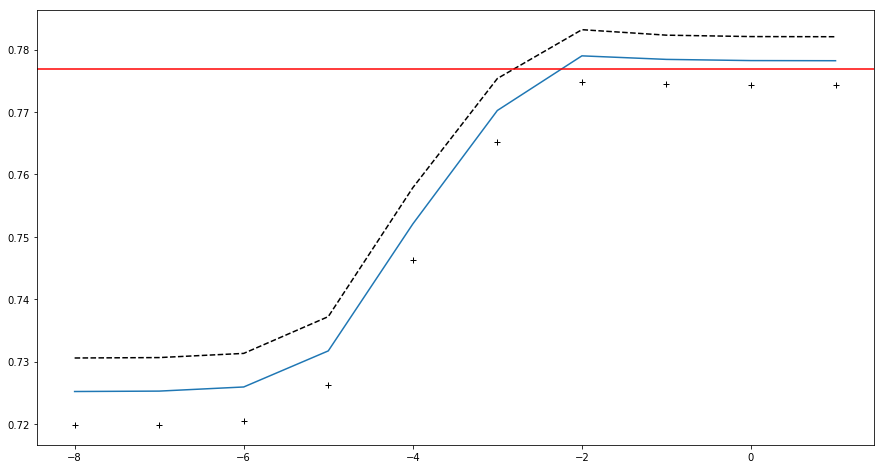

[0.72520791906659554, 0.72527319687196901, 0.72593483055134411, 0.73171857240853189, 0.75206377881852871, 0.77025725038496495, 0.77901485601341325, 0.77844717199679658, 0.77825747103057041, 0.77823509366608001]


In [38]:
import math
mean_auc = []
StdErr_auc = []
x = []
for c in aucs.keys():
    mean_auc.append(np.mean(aucs.get(c)))
    StdErr_auc.append(np.sqrt(np.var(aucs.get(c))/10))
    x.append(math.log10(c))
max_mean_auc = max(mean_auc)
max_mean_auc_index = mean_auc.index(max_mean_auc)
max_1std = mean_auc[max_mean_auc_index]-StdErr_auc[max_mean_auc_index]

y1 = [i - 2*j for i, j in zip(mean_auc, StdErr_auc)]
y2 = [i + 2*j for i, j in zip(mean_auc, StdErr_auc)]
fig = plt.figure(figsize = (15, 8))
plt.plot(x, mean_auc)
plt.plot(x, y1, 'k+' )
plt.plot(x, y2, 'k--')
plt.axhline(max_1std, color = 'r')
plt.show()

In [40]:
for (a,b) in zip(cs, mean_auc):
    print (a,b)

1e-08 0.725207919067
1e-07 0.725273196872
1e-06 0.725934830551
1e-05 0.731718572409
0.0001 0.752063778819
0.001 0.770257250385
0.01 0.779014856013
0.1 0.778447171997
1 0.778257471031
10 0.778235093666


select top 10 features, use cv to tune the hyperparameter C, and get the best C value 0.01, with auc 0.779